# MS 274 Homework 10
In this homework, you visualize seasonal and interannual differences in sea surface height from the Level 4 Multi-Sensor Sea Surface Height Anomaly product listed on the following page: 

https://podaac.jpl.nasa.gov/dataset/SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL2205

#### Import the modules

In [1]:
# import the modules you will need for this notebook
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import netCDF4 as nc4
import cartopy
import cartopy.crs as ccrs
import cmocean.cm as cm

### Problem 10.1: ENSO Analysis
In this problem, identify two dates - one in an extreme El Nino and one in an extreme La Nina. The timeseries of the multivariate ENSO index, detailed [HERE](https://psl.noaa.gov/enso/mei/) is a helpful reference. When you have identified two dates, obtain the two Level 4 SSHA fields that correspond to those dates and create a figure with 3 subplots organized in a single column. The top row should show the El Nino conditions, the second row should show the La Nina conditions, and the final row should show the difference between the El Nino and La Nina conditions.

The plots should have the following attributes:
- global maps centered on the Pacific
- global projection using cartopy
- latitude/longitude lines and labels
- title
- colorbar with appropriate colormap (El Nino and La Nina plot should use same color bounds)

In [2]:
# define a path to your ssh data folder
data_folder = 'C:\\Users\\seamu\\ms274\\week10_ssh\\ms274_hw_10\\raster_data_10.1'

In [3]:
file_path = 'C:\\Users\\seamu\\ms274\\week10_ssh\\ms274_hw_10\\raster_data_10.1\\ssh_grids_v2205_1997030312.nc'

In [4]:
dm = nc4.Dataset(file_path)

In [5]:
print(dm.variables.keys())

dict_keys(['Lon_bounds', 'Longitude', 'Lat_bounds', 'Latitude', 'Time', 'Time_bounds', 'SLA', 'SLA_ERR'])


In [6]:
print(dm.variables['SLA'])

<class 'netCDF4._netCDF4.Variable'>
float32 SLA(Time, Latitude, Longitude)
    units: m
    _FillValue: 9.96921e+36
    long_name: Sea Level Anomaly Estimate
    standard_name: sea_surface_height_above_sea_level
    coordinates: Time Longitude Latitude
    scale_factor: 1.0
    add_offset: 0.0
    alias: sea_surface_height_above_sea_level
unlimited dimensions: Time
current shape = (1, 960, 2160)
filling off


In [7]:
# read in the data from each of the files above,
# for one of the files, also read in the lon/lat info
ssh_file = 'ssh_grids_v2205_1997030312.nc'
ds = nc4.Dataset(data_folder+'\\'+ssh_file)
longitude = np.array(ds.variables['Longitude'])
latitude = np.array(ds.variables['Latitude'])

ds.close()


In [8]:
# define a function to compute average sea surface height
def compute_average_ssh(file_path_list):

    # make the sum and count grids
    sum_grid = np.zeros((960, 2160))
    count_grid = np.zeros((960, 2160))

    # loop through the file paths and add the data from
    # each to the sun and count grids
    for file_path in file_path_list:
        
        # get the wind field from the file
        ds = nc4.Dataset(file_path)
        ssh = np.array(ds.variables['SLA'])
        ds.close()    
        ssh= ssh[0, :, :]
             
        # mask the wind field and add it to the array
        ssh_masked = np.ma.masked_where(ssh>1000, ssh)
        ssh_mask = ~np.ma.getmaskarray(ssh_masked)
        # add the wind field info to the sum and count grids
        sum_grid[ssh_mask] = sum_grid[ssh_mask] + ssh[ssh_mask]
        count_grid[ssh_mask] = count_grid[ssh_mask] + 1


    # compute the average grid
    averaged_grid = sum_grid
    averaged_grid[count_grid>0] = sum_grid[count_grid>0]/count_grid[count_grid>0]
    averaged_grid = np.ma.masked_where(count_grid==0, averaged_grid)

    # return the average grid
    return(averaged_grid)

In [9]:
# create a list of files that correspond to el nino
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[3][:6] == '199710':
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
# compute the average sea surface height from this list
ssh_el_nino_average = compute_average_ssh(file_path_list)
print(ssh_el_nino_average)

# create a list of files that correspond to la nina
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[3][:6] == '201010':
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
# compute the average wind speed from this list
ssh_la_nina_average = compute_average_ssh(file_path_list)
#print(ssh_la_nina_average)


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [0.05854220874607563 0.05874337380131086 0.058950225512186684 ...
  0.05829044058918953 0.0584631705035766 0.058644543712337814]
 [0.05978361330926418 0.059958457946777344 0.060132881005605064 ...
  0.05957780654231707 0.05974236192802588 0.05991022661328316]
 [0.059990121672550835 0.06011326052248478 0.060232450564702354 ...
  0.059916642804940544 0.06004226580262184 0.060167294616500534]]


Text(0.5, 0.98, ' Sea Surface Height - 1997 El Nino vs 2010 La Nina')

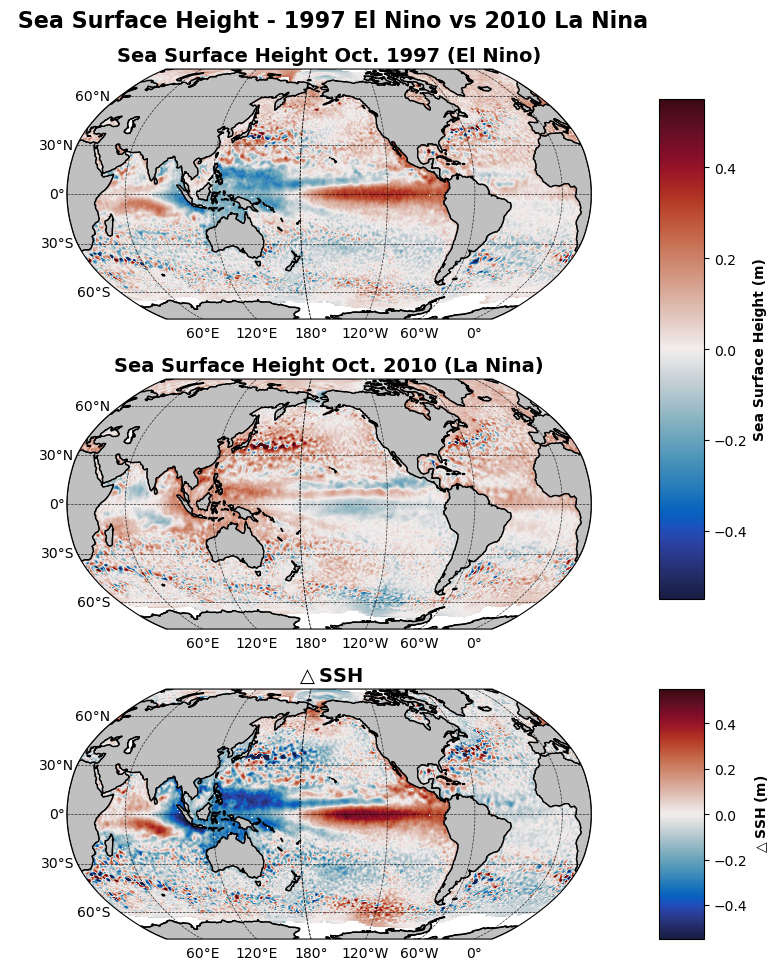

In [10]:
# copy and paste your plotting code from above
# create a figure with size (10,7)
fig = plt.figure(figsize=(15,10))

# create a 2x2 GridSpec frame
# use a 5% border, 5% horizonal spacing and 1% vertical spacing
gs = GridSpec(3, 1, bottom = 0.05, top = 0.92, left = 0.05, right = 0.95, wspace = 0.05, hspace = 0.24)

# add an axis for the el_nino field and plot it
ax1 = fig.add_subplot(gs[0,0], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
c1 = ax1.pcolormesh(longitude, latitude, ssh_el_nino_average, transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.55, vmax=0.55)
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
ax1.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
ax1.coastlines()
ax1.set_title('Sea Surface Height Oct. 1997 (El Nino)', fontsize='14', weight = 'bold')

# add an axis for the la nina field and plot it
ax1 = fig.add_subplot(gs[1,0], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
ax1.pcolormesh(longitude, latitude, ssh_la_nina_average, transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.55, vmax=0.55)
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
ax1.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
ax1.coastlines()
ax1.set_title('Sea Surface Height Oct. 2010 (La Nina)', fontsize='14', weight = 'bold')

# add a colorbar axis
# color bar axis is set by x and y, and then width and height
# x = 0.3, y = 0.5
# use width = 0.4, height = 0.05
cax = fig.add_axes([0.72, 0.39, 0.03, 0.5])
fig.colorbar(c1, cax=cax, orientation='vertical')
cax.set_ylabel('Sea Surface Height (m)', fontsize='10', weight = 'bold')

# add an axis for the delta SSH field and plot it
ax2 = fig.add_subplot(gs[2,0], projection = ccrs.Robinson(central_longitude = -160))
c2 = ax2.pcolormesh(longitude, latitude, (ssh_el_nino_average-ssh_la_nina_average), transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.55, vmax=0.55)
gl = ax2.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
ax2.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
ax2.coastlines()
ax2.set_title(r'$\triangle$''SSH', fontsize='14', weight = 'bold')

# add a colorbar axis
# color bar axis is set by x and y, and then width and height
# x = 0.3, y = 0.5
# use width = 0.4, height = 0.05
cax = fig.add_axes([0.72, 0.05, 0.03, 0.25])
fig.colorbar(c2, cax=cax, orientation='vertical')
cax.set_ylabel(r'$\triangle$''SSH (m)', fontsize='10', weight = 'bold')

fig.suptitle(' Sea Surface Height - 1997 El Nino vs 2010 La Nina', fontsize='16', weight = 'bold')

### Problem 10.2: Seasonal Analysis
In this problem, choose a year with neutral conditions (-0.5 < MEI < 0.5) and compute 5 averages of SSA for 1. Winter (DJF), 2. Spring (MAM), 3. Summer (JJA), 4. (SON), and 5. Annual. Then, create a figure with 2 columns and 4 rows. The first column should show the mean SSHA for each season. The second column should show the mean SSHA relative to the mean SSHA for the entire year (annual SSHA - mean SSHA). The figure should have an appropriate colormap colorbar for each column with values consistent across plots. In addition, each figure should have the attributes as listed for those in Problem 10.1 above.

In [11]:
# read in data and compute averages here
# create a list of files that correspond to win 03
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[3][:6] in ('200301', '200302', '200303'):
         file_path_list.append(data_folder+'\\'+file_name)  
#print(data_folder)
# compute the average sea surface height from this list
ssh_win_2003_average = compute_average_ssh(file_path_list)
#print(ssh_win_2003_average)
#print(len(ssh_win_2003_average))

# create a list of files that correspond to spr 03
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[3][:6] in ('200304', '200305', '200306'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
# compute the average wind speed from this list
ssh_spr_2003_average = compute_average_ssh(file_path_list)
#print(ssh_spr_2003_average)

# create a list of files that correspond to sum 03
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[3][:6] in ('200307', '200308', '200309'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
# compute the average sea surface height from this list
ssh_sum_2003_average = compute_average_ssh(file_path_list)
#print(ssh_sum_2003_average)

# create a list of files that correspond to fall 03
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[3][:6] in ('200310', '200311', '200312'):
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
# compute the average wind speed from this list
ssh_fall_2003_average = compute_average_ssh(file_path_list)
#print(ssh_fall_2003_average)

# create a list of files that correspond to year 03
file_path_list = []
for file_name in os.listdir(data_folder):
    if file_name[-3:]=='.nc' and file_name.split('_')[3][:4] == '2003':
         file_path_list.append(data_folder+'\\'+file_name)
#print(file_path_list)
#print(data_folder)
# compute the average wind speed from this list
ssh_year_2003_average = compute_average_ssh(file_path_list)
#print(ssh_year_2003_average)
#print(ssh_year_2003_average-ssh_fall_2003_average)

Text(0.5, 0.98, '2003 Mean Seasonal SSH & 2003 Seasonal SSH Anomaly')

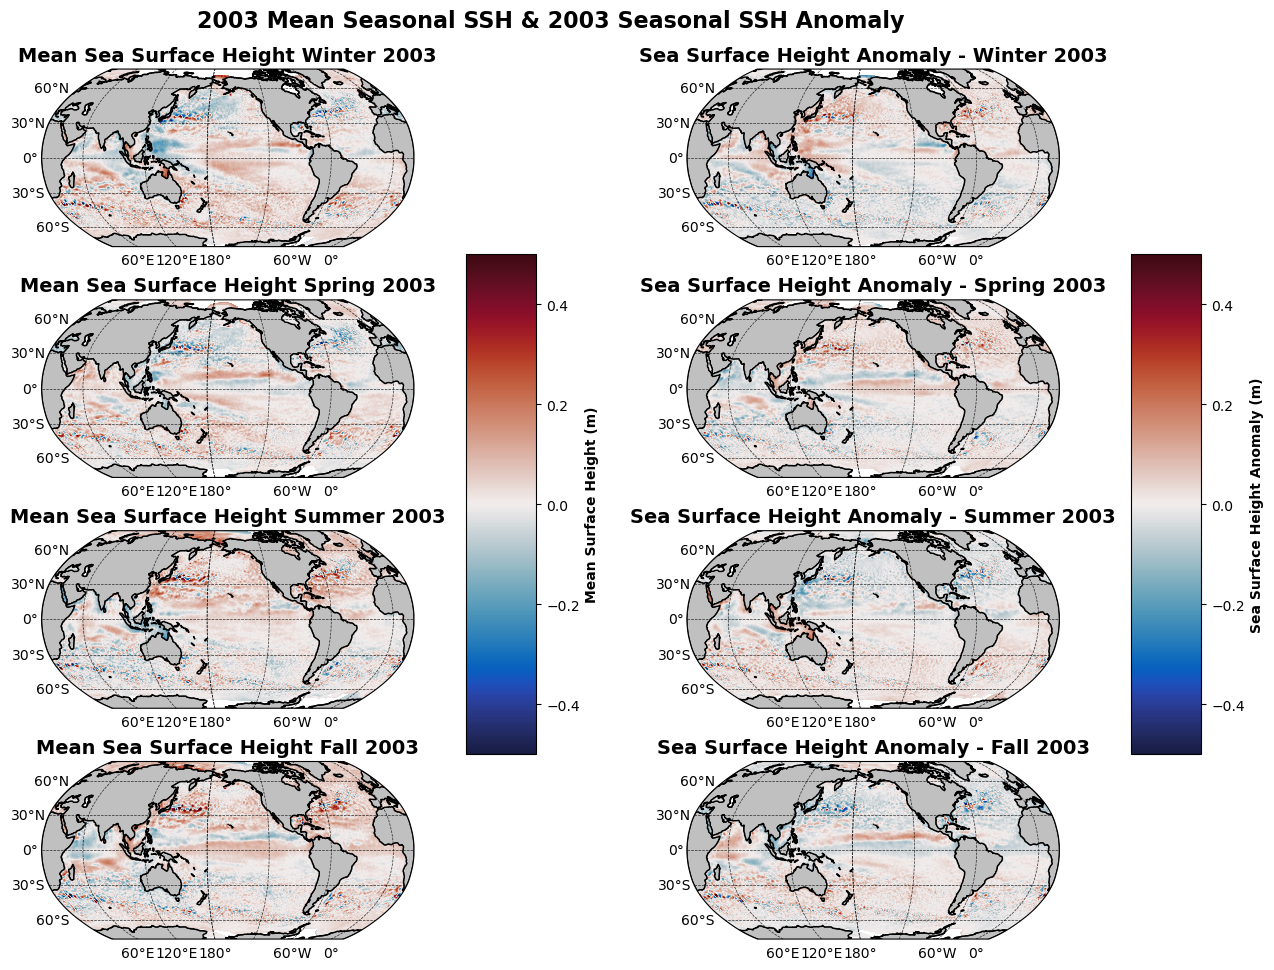

In [12]:
# copy and paste your plotting code from above
# create a figure with size (10,7)
fig = plt.figure(figsize=(14,10))

# create a 2x2 GridSpec frame
# use a 5% border, 5% horizonal spacing and 1% vertical spacing
gs = GridSpec(4, 2, bottom = 0.05, top = 0.92, left = 0.05, right = 0.95, wspace = 0.05, hspace = 0.30)

# add an axis for the mean win ssh field and plot it
axl = fig.add_subplot(gs[0,0], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
cl = axl.pcolormesh(longitude, latitude, ssh_win_2003_average, transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.5, vmax=0.5)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axl.coastlines()
axl.set_title('Mean Sea Surface Height Winter 2003', fontsize='14', weight = 'bold')

# add an axis for the mean spr ssh field and plot it
axl = fig.add_subplot(gs[1,0], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
axl.pcolormesh(longitude, latitude, ssh_spr_2003_average, transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.5, vmax=0.5)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axl.coastlines()
axl.set_title('Mean Sea Surface Height Spring 2003', fontsize='14', weight = 'bold')

# add an axis for the mean sum ssh field and plot it
axl = fig.add_subplot(gs[2,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, ssh_sum_2003_average, transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.5, vmax=0.5)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axl.coastlines()
axl.set_title('Mean Sea Surface Height Summer 2003', fontsize='14', weight = 'bold')


# add an axis for the mean fall ssh field and plot it
axl = fig.add_subplot(gs[3,0], projection = ccrs.Robinson(central_longitude = -160))
axl.pcolormesh(longitude, latitude, ssh_fall_2003_average, transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.5, vmax=0.5)
gl = axl.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axl.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axl.coastlines()
axl.set_title('Mean Sea Surface Height Fall 2003', fontsize='14', weight = 'bold')

# add a colorbar axis
# color bar axis is set by x and y, and then width and height
# x = 0.3, y = 0.5
# use width = 0.4, height = 0.05
cax = fig.add_axes([0.44, 0.235, 0.05, 0.5])
fig.colorbar(cl, cax=cax, orientation='vertical')
cax.set_ylabel('Mean Surface Height (m)', fontsize='10', weight = 'bold')

# add an axis for the anomaly win ssh field and plot it
axr = fig.add_subplot(gs[0,1], projection = ccrs.Robinson(central_longitude = -160)) #central_longitude = -180
cr = axr.pcolormesh(longitude, latitude, (ssh_year_2003_average-ssh_win_2003_average), transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.5, vmax=0.5)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axr.coastlines()
axr.set_title('Sea Surface Height Anomaly - Winter 2003', fontsize='14', weight = 'bold')

# add an axis for the anomaly spr ssh field and plot it
axr = fig.add_subplot(gs[1,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (ssh_year_2003_average-ssh_spr_2003_average), transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.5, vmax=0.5)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axr.coastlines()
axr.set_title('Sea Surface Height Anomaly - Spring 2003', fontsize='14', weight = 'bold')

# add an axis for the anomaly sum ssh field and plot it
axr = fig.add_subplot(gs[2,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (ssh_year_2003_average-ssh_sum_2003_average), transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.5, vmax=0.5)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axr.coastlines()
axr.set_title('Sea Surface Height Anomaly - Summer 2003', fontsize='14', weight = 'bold')


# add an axis for the anomaly fall ssh field and plot it
axr = fig.add_subplot(gs[3,1], projection = ccrs.Robinson(central_longitude = -160))
axr.pcolormesh(longitude, latitude, (ssh_year_2003_average-ssh_fall_2003_average), transform=ccrs.PlateCarree(), cmap=cm.balance, vmin=-0.5, vmax=0.5)
gl = axr.gridlines(draw_labels=True, linewidth=0.5, linestyle="--", alpha=0.8, color = 'black')
gl.top_labels = False
gl.right_labels = False
# add land features over the data
axr.add_feature(cartopy.feature.LAND, facecolor= 'silver', edgecolor= 'black') # this brings the continents to the front
# add the coastlines
axr.coastlines()
axr.set_title('Sea Surface Height Anomaly - Fall 2003', fontsize='14', weight = 'bold')

# add a colorbar axis
# color bar axis is set by x and y, and then width and height
# x = 0.3, y = 0.5
# use width = 0.4, height = 0.05
cax = fig.add_axes([0.915, 0.235, 0.05, 0.5])
fig.colorbar(cr, cax=cax, orientation='vertical')
cax.set_ylabel('Sea Surface Height Anomaly (m)', fontsize='10', weight = 'bold')

fig.suptitle('2003 Mean Seasonal SSH & 2003 Seasonal SSH Anomaly', fontsize='16', weight = 'bold')
